# Chapter 5: Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()

x = iris['data'][:,(3,2)]
y = (iris['target']==2).astype(np.float64) 

In [3]:
svm_clf = Pipeline([('scaler', StandardScaler()),('linear_svc', LinearSVC(C=1, loss='hinge'))])

svm_clf.fit(x,y)

svm_clf.predict([[5.5,1.7]])

array([1.])

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([('poly_features', PolynomialFeatures(degree=3)), ('scaler', StandardScaler()),('svmc',LinearSVC(C=10, loss='hinge'))])

polynomial_svm_clf.fit(x,y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svmc', LinearSVC(C=10, loss='hinge'))])

In [5]:
from sklearn.svm import SVC

polynomial_svm_kernel = Pipeline([('scaler', StandardScaler()),('svmc',SVC(kernel='poly', C=5, coef0=1, degree=3))])

polynomial_svm_kernel.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svmc', SVC(C=5, coef0=1, kernel='poly'))])

In [6]:
rbf_svm_kernel = Pipeline([('scaler', StandardScaler()),('svmc',SVC(kernel='rbf', C=0.0001, gamma=5))])

rbf_svm_kernel.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()), ('svmc', SVC(C=0.0001, gamma=5))])

In [7]:
# quanto maior o gamma, mais ajustado a forma dos dados a região fica. se o modelo está overfitting, deve diminui-lo

# quanto maior C, menor a margem, a área da região. se o modelo está underfitting, tem que aumentá-lo

In [8]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1)

svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')

# Exercises

### What is the fundamental idea behind Support Vector Machines?

The fundamental idea of a Support Vector Machine is to find the vector that separates the classes maximizing the margin width between them. Some instances may fall inside them.

### What is a support vector?

A support vector is any instance that is inside the margin including borders. The others instances that aren't support vectors doesn't influence in the decision boundaries definition.

### Why is it important to scale the inputs when using SVMs?

It's a model that tries to maximize distances, so, if some attributes have small values they will be neglected during the training.

### Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

No, but you can use the distance between the test instance and the decision boundary as a confidence score. We can set probability = True in scikit-learn SVM model. 

### Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?

SVMs that uses kernel only have the dual form. In linear classification, we must use the primal form because its complexity is proportional to m, while the dual is proportional to m².

### Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?

Increase C and gamma in order to reduce regularization.

### Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [13]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [16]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 10
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier:".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier: [0.117] [[0.77735075 0.73012524]]


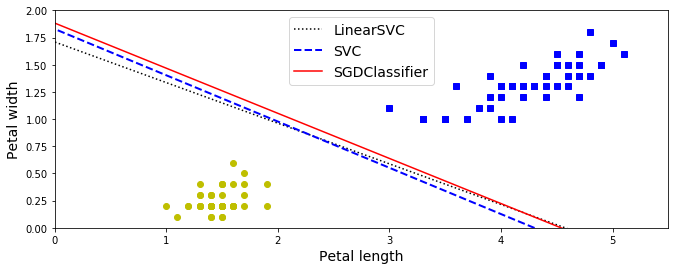

In [18]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


### Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [19]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666